In [12]:
!pip install scikit-learn

You should consider upgrading via the 'C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
url = "https://raw.githubusercontent.com/WildanBudiawanZ/pembelajaran-mesin/main/position_salaries.csv"
dataset = pd.read_csv(url)


#iloc takes the values from the specified index locations and stores them in the assigned variable as an array
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [16]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

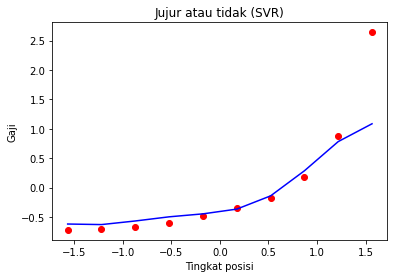

In [17]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

In [18]:
# Memprediksi hasil
# y_pred = regressor.predict(6.5)
# y_pred = regressor.predict(sc_X.transform(6.5))
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))
# y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

#y_pred = regressor.predict(6.5)
y_pred = y_pred.reshape(-1, 1)
y_pred = sc_y.inverse_transform(y_pred) 
y_pred

array([[170370.0204065]])

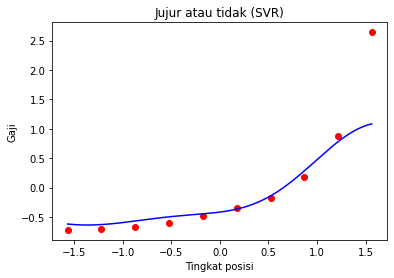

In [19]:
# Visualisasi hasi SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01) # Pilih 0.01 dan bukan 0.1, karena datanya sudah melalui feature scaling
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')
X = dataset['Temperature'].values
y = dataset['Revenue'].values
dataset.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [36]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor()

In [37]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [38]:
y_pred = regressor.predict([[12]])
y_pred

array([300.9322734])

In [39]:
df = pd.DataFrame({'Real values':y_test.reshape(-1), 'Predicted values':y_pred.reshape(-1)})
df

ValueError: All arrays must be of the same length

ValueError: x and y must be the same size

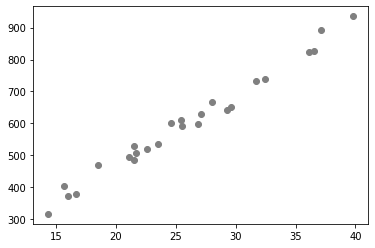

In [40]:
# Visualising the Decision Tree Regression Results 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'grey')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'orange')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')
X = dataset['Temperature'].values
y = dataset['Revenue'].values

dataset

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [45]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7088\2001909841.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))


RandomForestRegressor(n_estimators=10, random_state=0)

In [46]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [47]:
y_pred = regressor.predict([[10]])
y_pred

array([281.63886554])

In [48]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

ValueError: All arrays must be of the same length

ValueError: x and y must be the same size

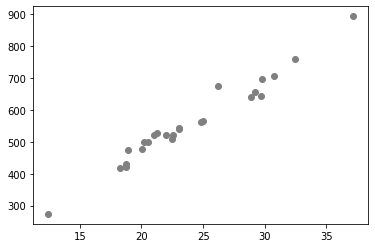

In [49]:
# # Visualising the Random Forest Regression Results  
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'grey')
plt.scatter(X_test, y_pred, color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'orange')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [50]:
url = 'https://raw.githubusercontent.com/WildanBudiawanZ/pembelajaran-mesin/main/FuelConsumptionCo2.csv'
cdf = pd.read_csv(url)

cdf.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [51]:
cdf.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


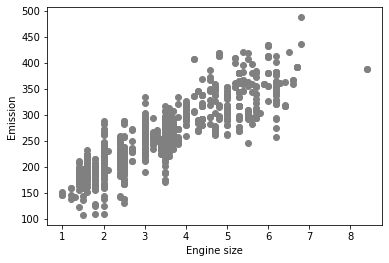

In [52]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='grey')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [53]:
# get the "engine size" as the independent variable (regressor)
X = cdf.iloc[:, 4].values

# get the "emission" as the dependent variable
y = cdf.iloc[:, 12].values


# Reshape data because only use one features in "engine size"
X = X.reshape(-1,1)

# Reshape data because only one features
y = y.reshape(-1,1)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [54]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X, y)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7088\2827038375.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, y)


RandomForestRegressor()

In [55]:
# Predicting a new result
y_pred = regressor.predict(sc_X.transform(np.array([[1.3]])))

y_pred = y_pred.reshape(-1, 1)
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([[146.9035855]])

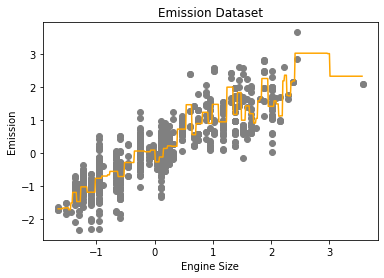

In [56]:
# Visualising the Random Forest Regression results (higher resolution) with scaling value
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'grey')
plt.plot(X_grid, regressor.predict(X_grid), color = 'orange')
plt.title('Emission Dataset')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()